# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
data = pd.read_excel('DataForTable2.1.xls', dtype=str) # was getting errors so imported as string

data.sample(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
831,Honduras,2008,5.420331001281738,8.504487037658691,0.8281759023666382,62.70000076293945,0.686880886554718,0.21883884072303772,0.8632220029830933,0.7189487814903259,0.20585381984710693
2202,United Arab Emirates,2019,6.710782527923584,11.181390762329102,0.8615332841873169,66,0.9114195108413696,0.11776263266801834,NaN,0.7300516366958618,0.2837632894515991
1850,Singapore,2022,6.333045959472656,11.59022045135498,0.8519465923309326,73.9000015258789,0.8732906579971313,0.08843813836574554,NaN,0.6875272393226624,0.20898351073265076
1653,Peru,2011,5.892457485198975,9.262930870056152,0.7563045620918274,67.76000213623047,0.7727594971656799,-0.1284000724554062,0.8236649632453918,0.7424664497375488,0.3309212625026703
460,Congo (Brazzaville),2021,4.920531272888184,8.081596374511719,0.567651093006134,56.849998474121094,0.7376614809036255,-0.022623978555202484,0.7327299118041992,0.5675566792488098,0.4204559326171875


## Notes on Data

[FAQ](https://worldhappiness.report/faq/)
- Life Ladder = Quality of life, scale of 1 - 10. 10 is best
- Countries are compared to Dystopia, a fictional country that serves as the least happy country and no country can be less happy that Dystopia

See [Appendix 1 from 2024](https://happiness-report.s3.amazonaws.com/2024/Ch2+Appendix.pdf) for more information about the variables if you need.
- Log GDP per capita - straightforward
- Social Support - Counting on someone when times are tough; national average of binary response
- Healthy life expectancy - straightforward
- Freedom to make life choices - national avg of binary response
- Generosity - residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of Corruption - average of the perception at the individual level
- Positive effect -  Positive affect is defined as the average of three positive affect measures in GWP: laugh, enjoyment and doing interesting things in the Gallup World Poll
- Negative affect - is defined as the average of three negative affect measures in GWP. They are worry, sadness and anger,

# Data Feeling and Cleaning

In [13]:
#check shape of data
data.shape

(2363, 11)

In [14]:
#check column names, nulls, and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country name                      2363 non-null   object
 1   year                              2363 non-null   object
 2   Life Ladder                       2363 non-null   object
 3   Log GDP per capita                2335 non-null   object
 4   Social support                    2350 non-null   object
 5   Healthy life expectancy at birth  2300 non-null   object
 6   Freedom to make life choices      2327 non-null   object
 7   Generosity                        2282 non-null   object
 8   Perceptions of corruption         2238 non-null   object
 9   Positive affect                   2339 non-null   object
 10  Negative affect                   2347 non-null   object
dtypes: object(11)
memory usage: 203.2+ KB


In [15]:
#number of unique values per features
data.nunique()

Country name                         165
year                                  19
Life Ladder                         2363
Log GDP per capita                  2334
Social support                      2350
Healthy life expectancy at birth    1126
Freedom to make life choices        2326
Generosity                          2282
Perceptions of corruption           2238
Positive affect                     2339
Negative affect                     2347
dtype: int64

In [16]:
#check for duplicates
data.duplicated().sum()

0

In [3]:
#function to check nulls
def check_nulls(dataframe):
    my_nulls = dataframe.isna().sum()
    return my_nulls

#number of nulls per feature
check_nulls(data)

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [4]:
#need to change datatype
for feature in data.columns:
    if feature != 'Country name':
        if feature == 'year':
            data[feature] = data[feature].astype(int)
        else:
            data[feature] = data[feature].astype(float)

#check change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


# Exploratory Data Analysis

In [3]:
nulls = data.isna().sum()
total_nulls = nulls.values.sum()
original_size = data.shape[0]

loss = (((original_size - total_nulls) / original_size) - 1) * 100
print(f"Removing the nulls results in a loss of {loss} percent")

Removing the nulls results in a loss of -16.33516716038934 percent


For the nulls, I could remove them, but I think I'm going to try and take the mean or average per feature on a country by country basis. Removing the nulls isn't all that bad considering we only lose about 16% of the data, but wouldn't hurt to compare.

In [5]:
#dealing with nulls in Log GDP per capita

#function to get average per country
def get_average(dataframe, feature):
    #groupby country and get mean
    my_mean = dataframe.groupby('Country name')[feature].mean()
    return my_mean

#get median
def get_median(dataframe, feature):
    my_median = dataframe.groupby('Country name')[feature].median()
    return my_median

#fill in nas something is going wrong here
def fill_nulls(dataframe, feature, key, value=['mean', 'median']):
    if value == 'mean':
        my_mean = get_average(dataframe, feature).to_dict() #get average for each country
        dataframe[feature] = dataframe[feature].fillna(dataframe[key].map(my_mean)) #fill nulls with nulls
    elif value == 'median':
        my_median = get_median(dataframe, feature).to_dict() #calc median for each country
        dataframe[feature] = dataframe[feature].fillna(dataframe[key].map(my_median)) #fill nulls with median
    else:
        print("Please specify mean or median for the value parameter.")
    return dataframe



In [7]:
#make copy of data
data_copy = data.copy()

In [8]:
#check nulls
check_nulls(data_copy)

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [8]:
#deal with nulls in Log GDP per capita
fill_nulls(data_copy, 'Log GDP per capita', 'Country name', 'mean')


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [10]:
data_copy.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    9
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [9]:
#handle nulls for social support
fill_nulls(data_copy, 'Social support', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [10]:
#handle nulls for Healthy life
fill_nulls(data_copy, 'Healthy life expectancy at birth', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [11]:
#handle nulls for freedom
fill_nulls(data_copy, 'Freedom to make life choices', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [12]:
#handle nulls for generosity
fill_nulls(data_copy, 'Generosity', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [13]:
#Nulls for curruptions
fill_nulls(data_copy, 'Perceptions of corruption', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [14]:
# nulls positive affect
fill_nulls(data_copy, 'Positive affect', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [15]:
#nulls for negative effect
fill_nulls(data_copy, 'Negative affect', 'Country name', 'median')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [16]:
#check above work
check_nulls(data_copy)

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth    50
Freedom to make life choices         0
Generosity                           9
Perceptions of corruption           30
Positive affect                      2
Negative affect                      1
dtype: int64

In [17]:
#check percentage loss if nulls removed
original_size = data_copy.shape[0]
no_nulls = data_copy.dropna()
no_null_size = no_nulls.shape[0]

loss = (((no_null_size / original_size) - 1) * 100)

print(f"Removing nulls results in loss of {loss} percent")

Removing nulls results in loss of -3.554803216250524 percent


Way less nulls and these can probably be removed. Losing approx 3-4% of data is acceptable

In [18]:
#drop nulls 
data_copy = data_copy.dropna()

check_nulls(data_copy)

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

# Exploratory Data Analysis - Canada only

In [40]:
#find range of years
min_year = data_copy['year'].min()
max_year = data_copy['year'].max()
year_range = max_year - min_year

print(f"min_year: {min_year}\nmax_year: {max_year}\nrange: {year_range}")

min_year: 2005
max_year: 2023
range: 18


In [19]:
#get frequency count of each country
most_frequent = pd.DataFrame(data_copy.groupby('Country name')['year'].count().sort_values(ascending=False))
#reset index and rename columns
most_frequent.reset_index(inplace=True)
most_frequent.columns = ['Country', 'Frequency']

#filter for countries with a frequency of 18; only interested in those There are 56 countries
most_common = most_frequent[most_frequent['Frequency'] >= 18]

#create list of desired countries
most_frequent_country = list(most_common['Country'])
len(most_frequent_country)

56

In [35]:
#filter for most common, I wanted countries that appeared the most in the data
select_countries = data_copy[data_copy['Country name'].isin(most_frequent_country)]

# check numbers
# select_countries.groupby('Country name').count()


#select a specific country to analyze - Canada here because I'm Canadian
canada = select_countries[select_countries['Country name'] == 'Canada']

canada

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
349,Canada,2005,7.418048,10.707299,0.961552,70.500000,0.957306,0.246243,0.502681,0.783299,0.233278
350,Canada,2007,7.481753,10.733993,0.930611,70.620003,0.930341,0.243819,0.405608,0.811577,0.256810
351,Canada,2008,7.485604,10.733157,0.938707,70.680000,0.926315,0.255927,0.369588,0.802224,0.202175
352,Canada,2009,7.487824,10.692043,0.942845,70.739998,0.915058,0.240570,0.412622,0.793211,0.247633
353,Canada,2010,7.650346,10.711356,0.953765,70.800003,0.933949,0.224798,0.412660,0.791042,0.233113
354,Canada,2011,7.426054,10.732545,0.921669,70.860001,0.950925,0.247492,0.432992,0.802900,0.247729
355,Canada,2012,7.415144,10.739143,0.948128,70.919998,0.917961,0.284352,0.465602,0.775569,0.229332
356,Canada,2013,7.593794,10.751601,0.936239,70.980003,0.916014,0.309982,0.406236,0.800634,0.262850
357,Canada,2014,7.304258,10.769844,0.917836,71.040001,0.938898,0.264188,0.441735,0.790683,0.258602
358,Canada,2015,7.412773,10.768951,0.939067,71.099998,0.931469,0.247151,0.427152,0.791709,0.286280


In [36]:
#describe data
canada.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.444444,7.296854,10.756211,0.932491,71.046667,0.916866,0.210028,0.420006,0.778354,0.257264
std,5.436502,0.242268,0.034319,0.013831,0.302266,0.032574,0.069244,0.037656,0.026693,0.029262
min,2005.000000,6.841207,10.692043,0.902473,70.500000,0.838264,0.042831,0.362034,0.719483,0.202175
25%,2010.250000,7.125682,10.733366,0.924620,70.815002,0.911750,0.190630,0.390220,0.768963,0.234314
50%,2014.500000,7.413821,10.759596,0.930611,71.070000,0.922138,0.232684,0.419906,0.786991,0.257706
75%,2018.750000,7.467828,10.785029,0.938977,71.287502,0.937660,0.247407,0.440410,0.797821,0.282684
max,2023.000000,7.650346,10.803154,0.961552,71.500000,0.957306,0.309982,0.502681,0.811577,0.306674


In [37]:
#describe countries
canada.describe(include='O')

,Country name
count,18
unique,1
top,Canada
freq,18


In [69]:
select_countries.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [52]:
#Boxplot and Histograms

def make_histogram(dataframe, num_rows, num_col, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_col, figsize=fig_size)
    my_columns = [column for column in dataframe.columns if column != 'Country name' and column != 'year']
 
    for i in range(num_rows):
        for j in range(num_col):
            idx = i * num_col + j
            if idx < len(my_columns):
                column = my_columns[idx]
                axs[i, j].hist(dataframe[column])
                axs[i, j].set_title(column)
    plt.suptitle('Histograms')
    plt.show()

#function to make boxplots

def make_boxplot(dataframe, num_rows, num_col, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_col, figsize=fig_size)
    my_columns = [column for column in dataframe.columns if column != 'Country name' and column != 'year']
 
    for i in range(num_rows):
        for j in range(num_col):
            idx = i * num_col + j
            if idx < len(my_columns):
                column = my_columns[idx]
                axs[i, j].boxplot(dataframe[column])
                axs[i, j].set_title(column)
    plt.suptitle('Boxplots')
    plt.show()

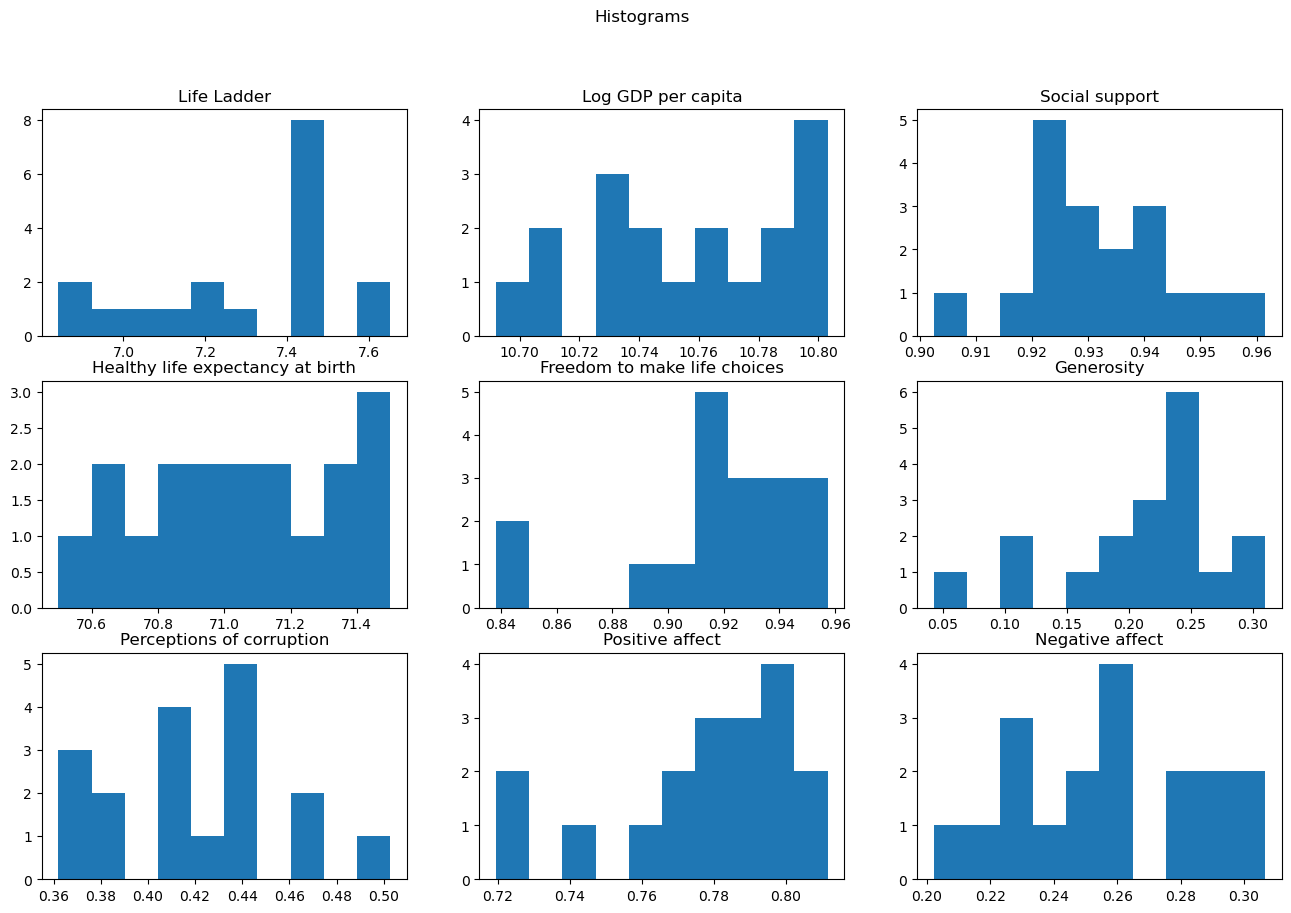

In [53]:
#plot histograms
make_histogram(canada, 3, 3, (16, 10))

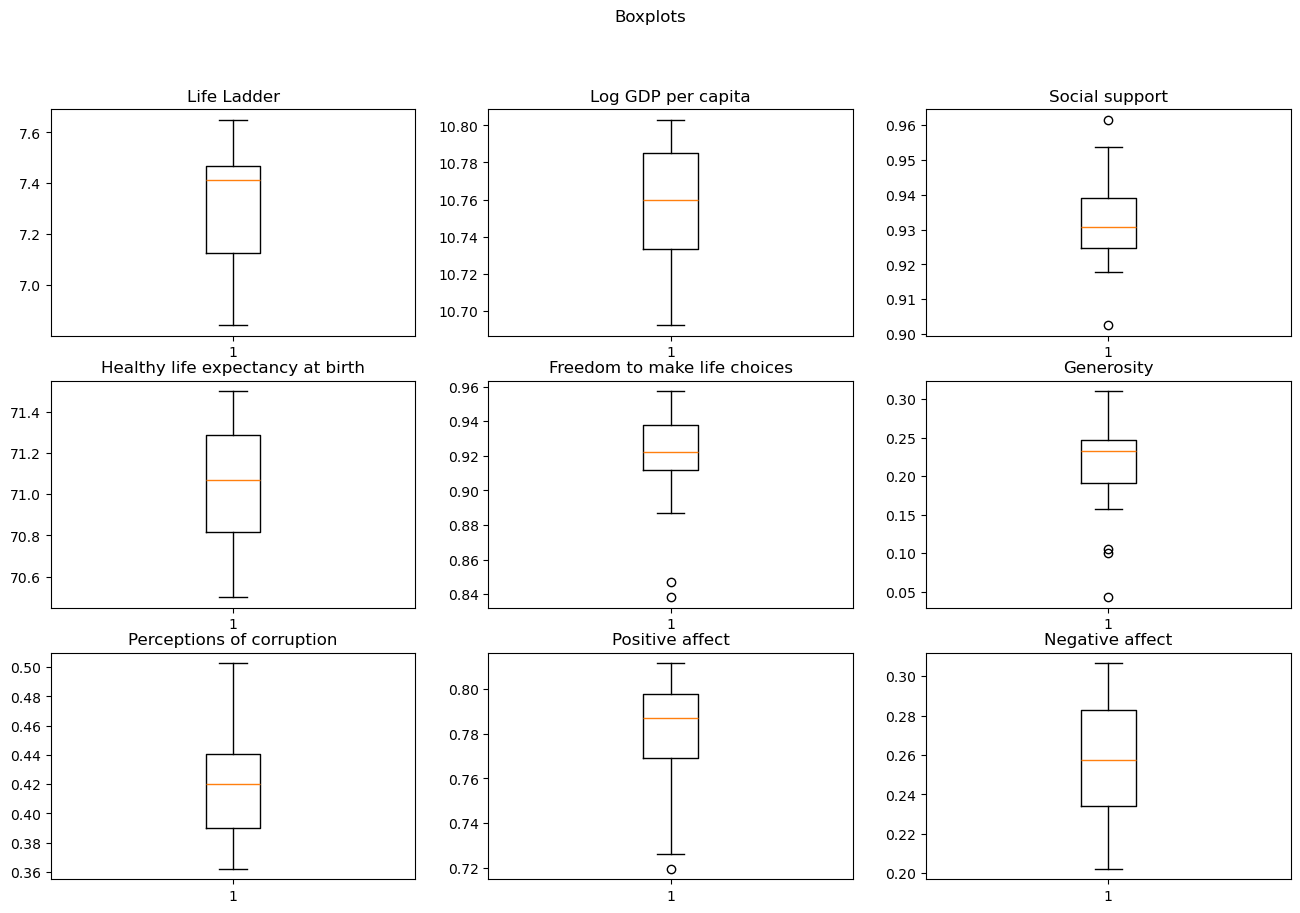

In [54]:
#plot boxplots
make_boxplot(canada, 3, 3, (16, 10))

Interesting plots...results especially with the histograms

## Trend over time

In [61]:
# function to plot trend of feature over time
def make_scatters(dataframe, num_rows, num_col, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_col, figsize=fig_size)
    my_columns = [column for column in dataframe.columns if column != 'year' and column != 'Country name']

    for i in range(num_rows):
        for j in range(num_col):
            idx = i * num_col + j
            if idx < len(my_columns):
                column = my_columns[idx]
                axs[i,j].plot(dataframe['year'], dataframe[column], linestyle='-', marker='o')
                axs[i, j].set_title(column)
    plt.suptitle('Canada metrics by Year')
    plt.show()


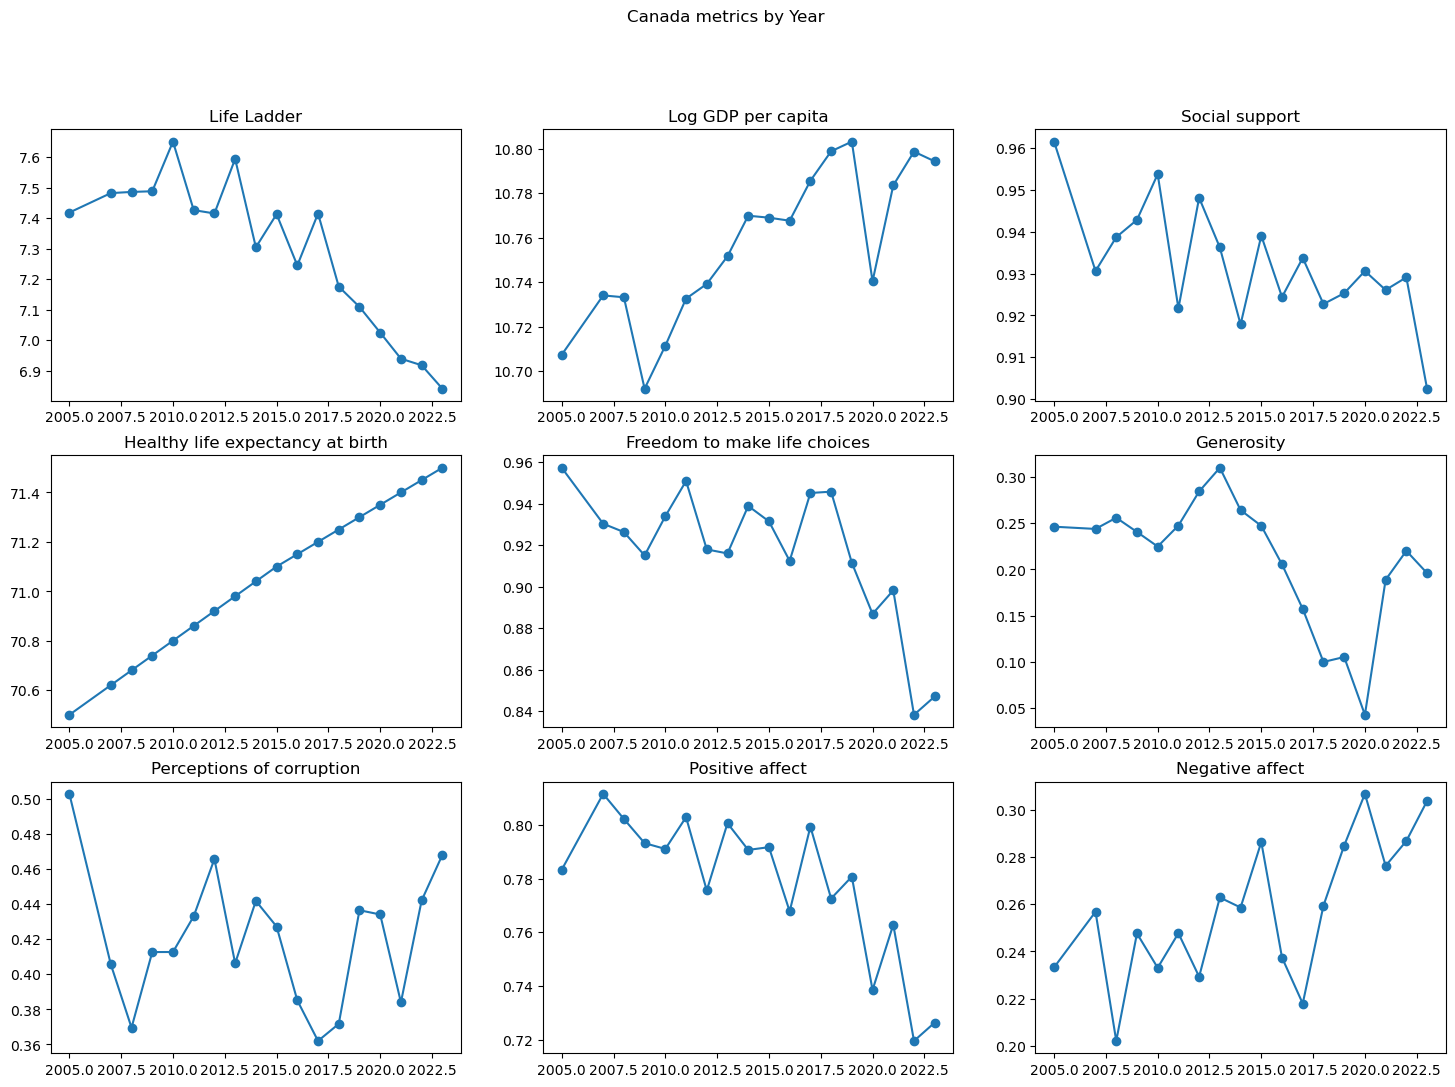

In [62]:
#make scatter plots
make_scatters(canada, 3, 3, (18, 12))

## Relationships among Variables - exclude year and Country name

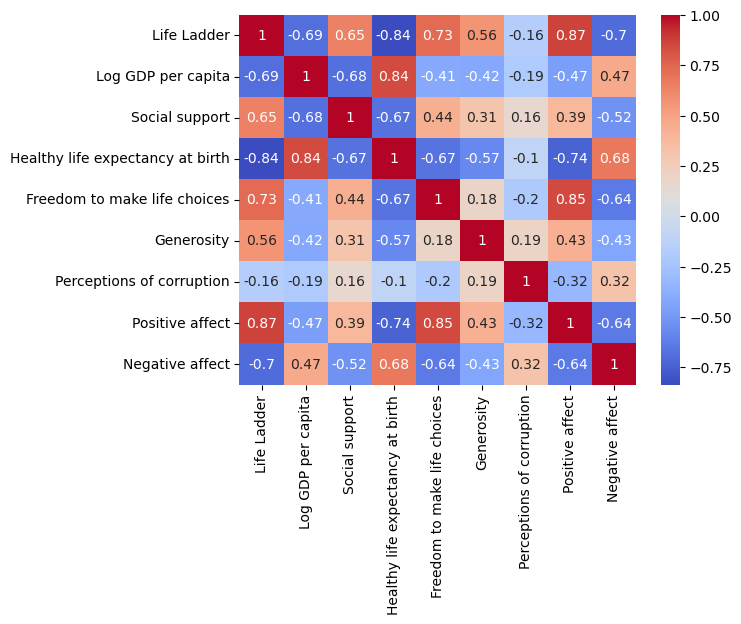

In [63]:
#make heatmaps
def make_heatmap(dataframe):
    my_columns = [column for column in dataframe.columns if column != 'year' and column != 'Country name']
    correlation = dataframe[my_columns].corr()
    sns.heatmap(correlation, cmap='coolwarm', annot=True)
    plt.show()

make_heatmap(canada)

Everything appears correlated with the Life ladder score (the target) and all inputs appear to be correlated with one another too

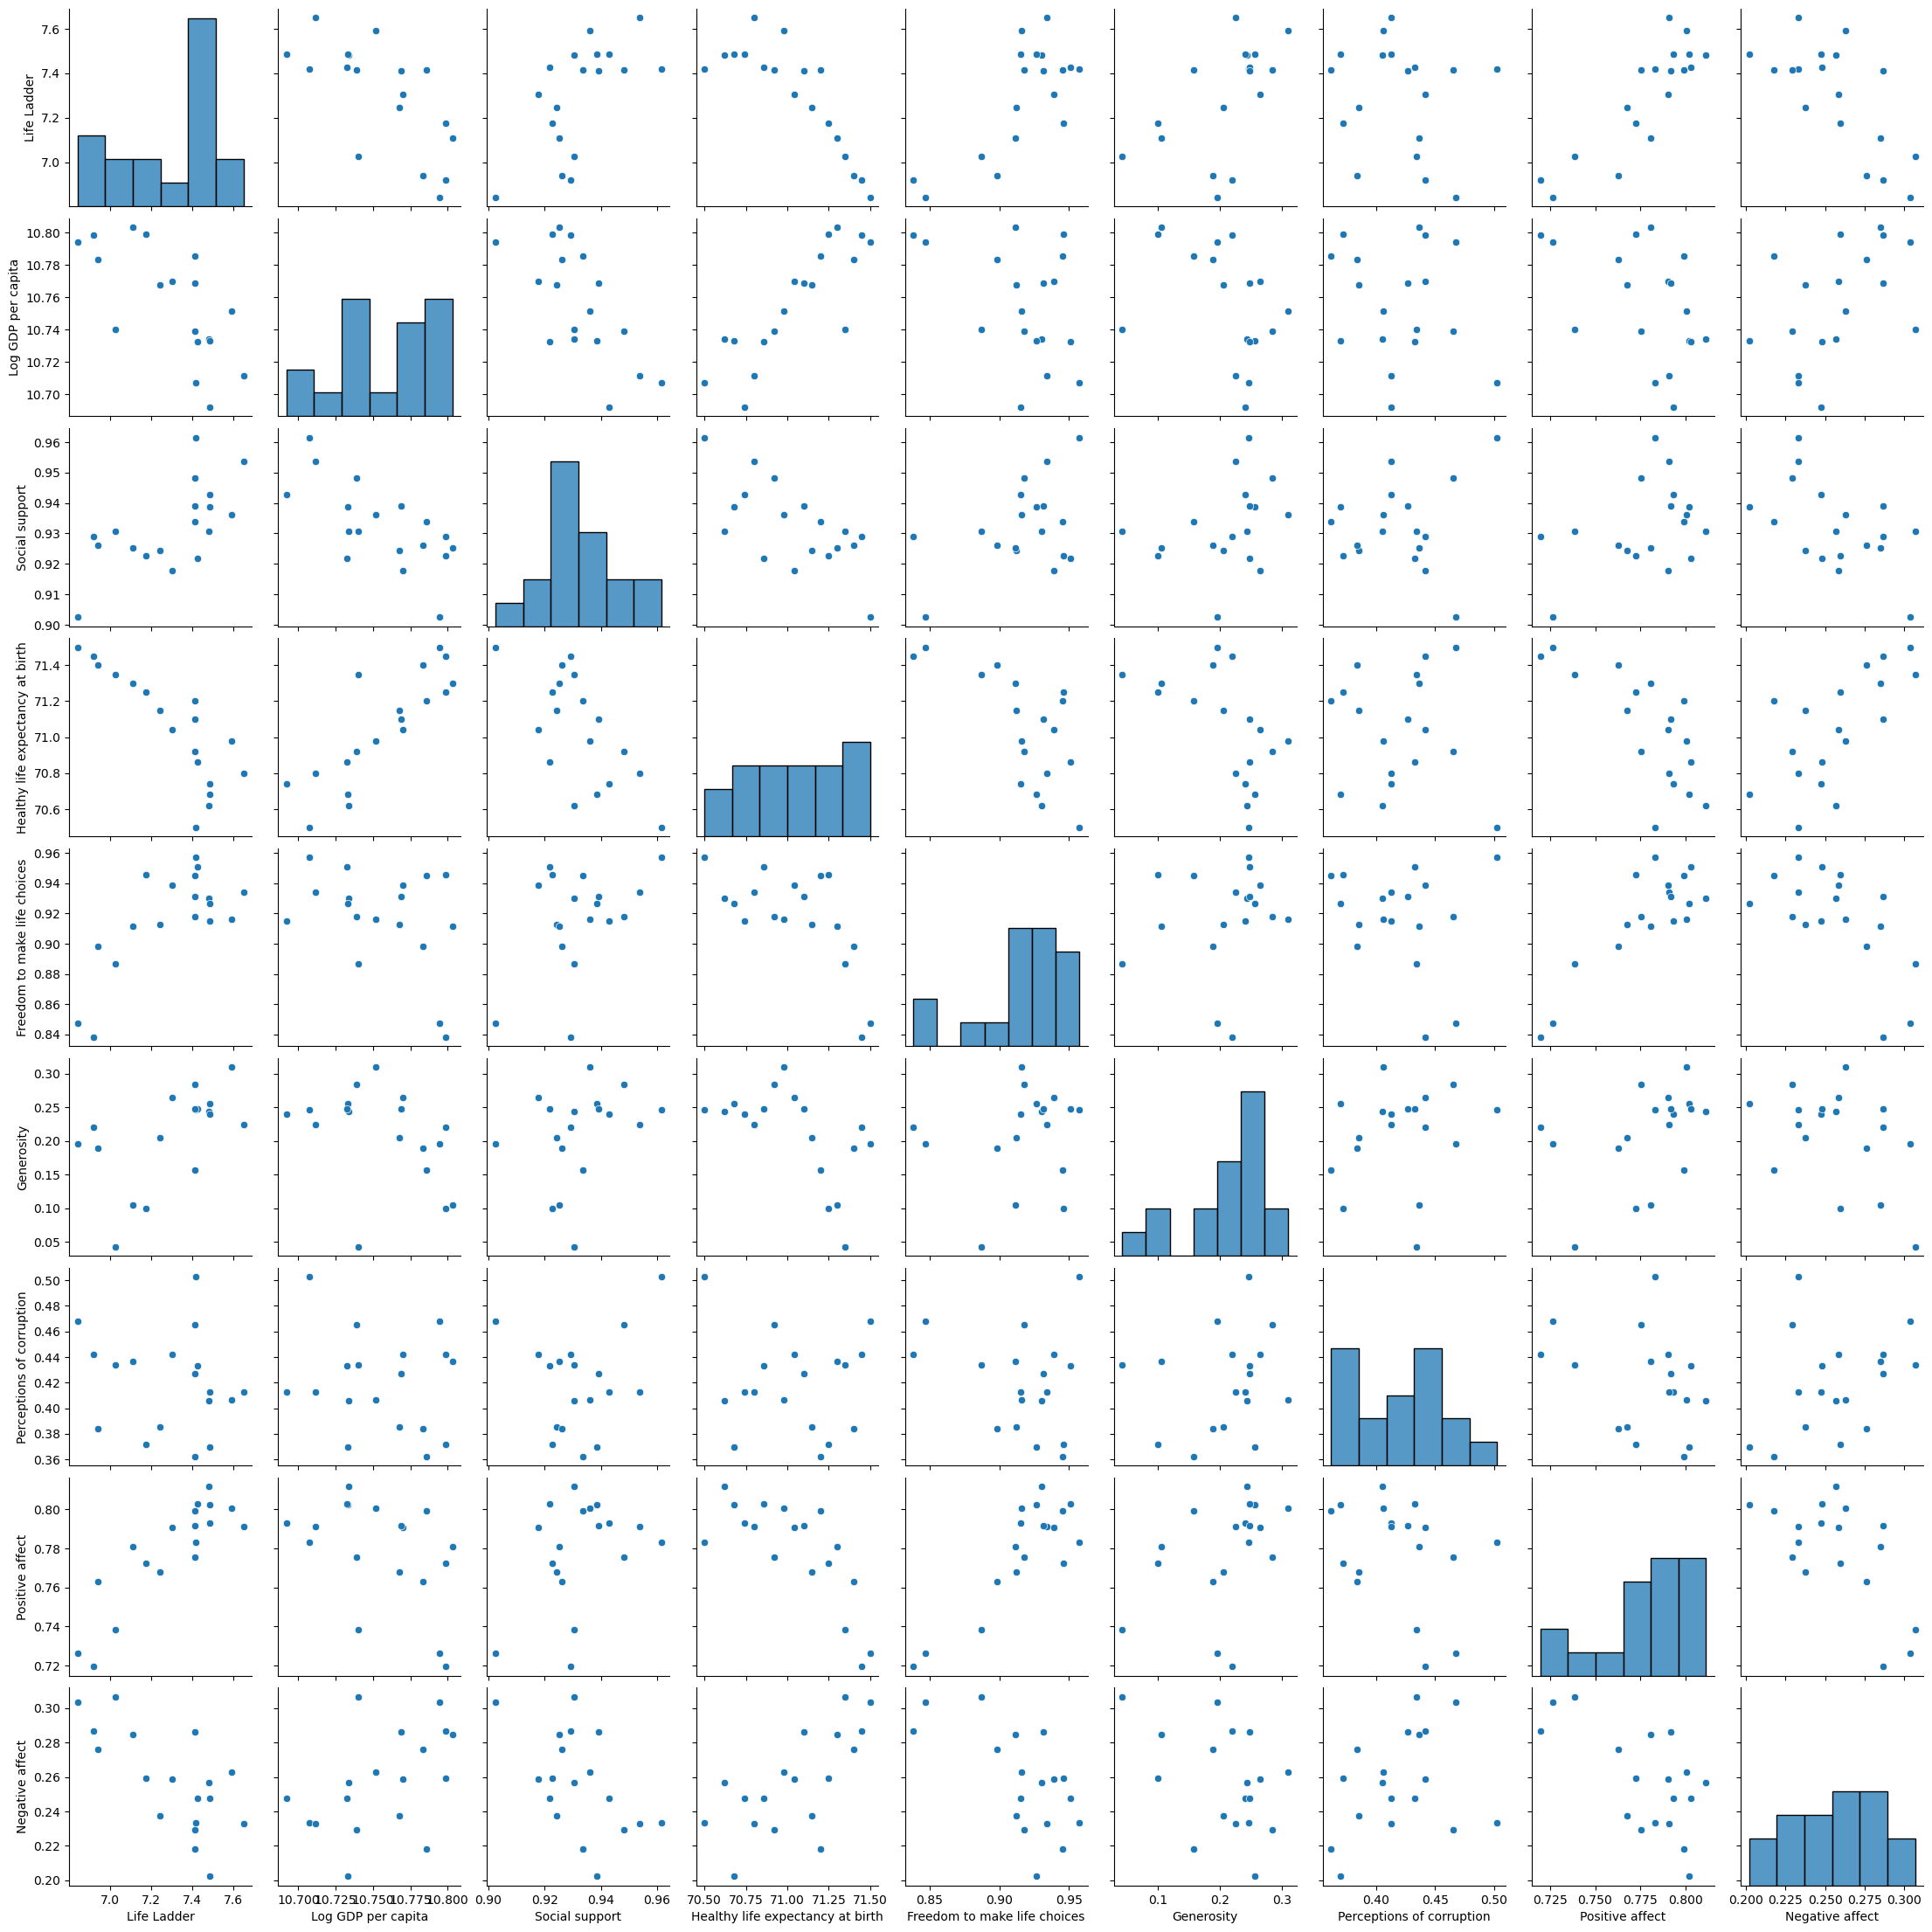

In [64]:
#make a pair plot
def make_pairplot(dataframe):
    my_columns = [column for column in dataframe.columns if column != 'year' and column != 'Country name']
    sns.pairplot(dataframe[my_columns])
    plt.show()

make_pairplot(canada)

Maybe do some statisitcal tests? Time to move on to Global competitiveness reports?